## Aplicar un modelo de regresion lienal con 2018 para predecir con 2019

In [1]:
import pandas as pd
from src.utils.utils import get_base_dir

In [2]:
base_dir = get_base_dir()
base_dir

WindowsPath('C:/Users/lauta/Desktop/Lautaro/maestria_ds/labo3/repo-entrega')

## Cargar datasets

In [3]:
# base a predecir
df_pred = pd.read_csv((base_dir / "data/predict/raw/product_id_apredecir201912.txt"), sep="\t", encoding="utf-8")

In [4]:
# df sell-in original
DATA_PATH_SELL_IN = base_dir/ "data/raw/sell-in.txt"
sell_in = pd.read_csv(DATA_PATH_SELL_IN, sep="\t")

## Agrupar a nivel producto

In [5]:
sell_in_agrup = sell_in.groupby(["periodo","product_id"]).agg({"tn":"sum"}).reset_index().sort_values(by=["periodo","product_id"])

In [6]:
sell_in_agrup.groupby("product_id").agg({"tn":"sum"}).sort_values(by="tn", ascending=False).head(10)

,tn
product_id,
20001,50340.39558
20002,36337.25439
20003,32004.15274
20004,24178.15379
20005,23191.21852
20007,22018.45234
20006,21088.76007
20008,19948.29352
20010,18671.07918


## Check series productos

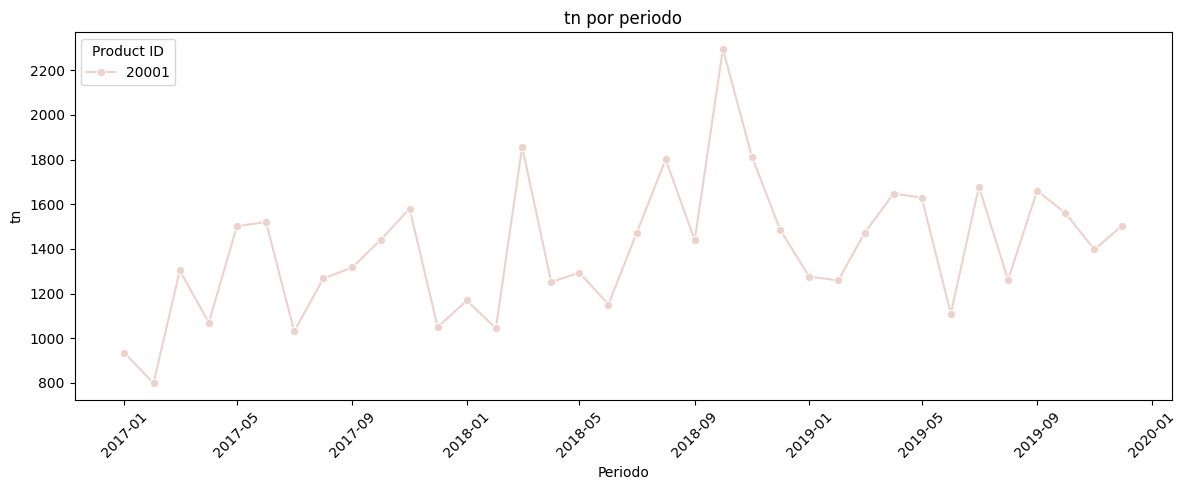

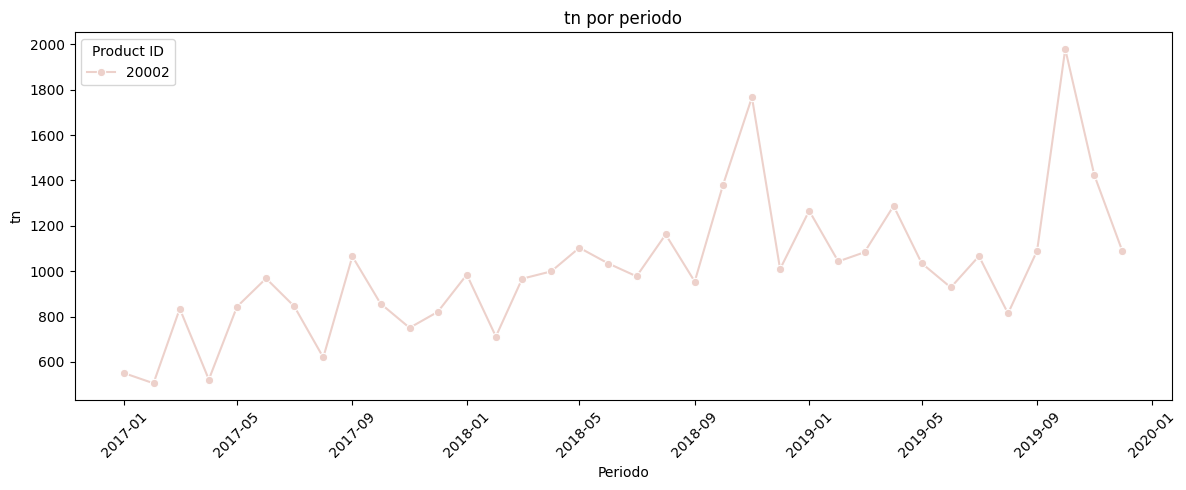

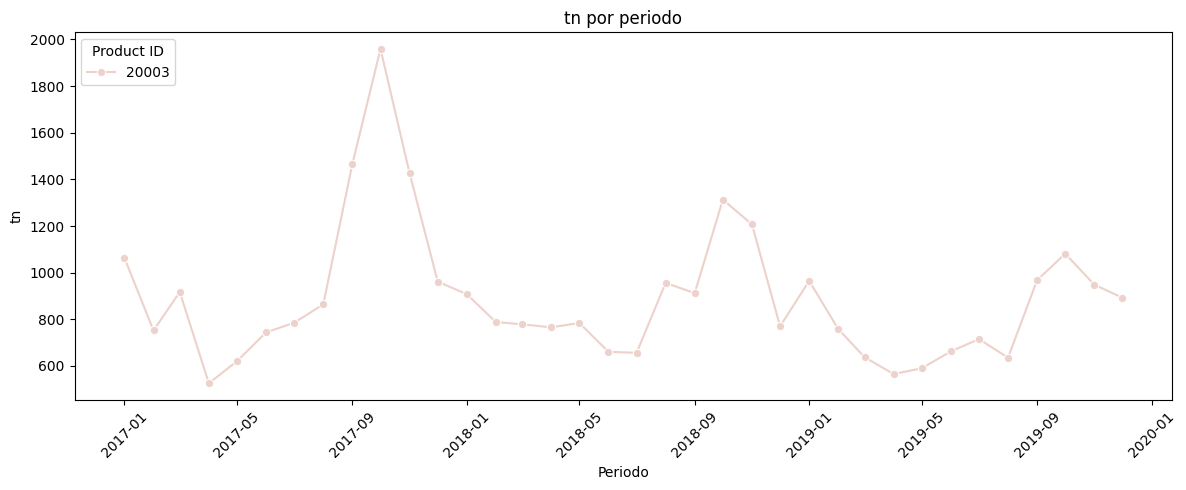

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
sell_in_agrup["fecha"] = pd.to_datetime(
    sell_in_agrup["periodo"].astype(str), format="%Y%m"
)

plt.figure(figsize=(12, 5))
sns.lineplot(
    data=sell_in_agrup[sell_in_agrup["product_id"]==20001], x="fecha", y="tn", hue="product_id", marker="o"
)
plt.title("tn por periodo")
plt.ylabel("tn")
plt.xlabel("Periodo")
plt.legend(title="Product ID", loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
sns.lineplot(
    data=sell_in_agrup[sell_in_agrup["product_id"]==20002], x="fecha", y="tn", hue="product_id", marker="o"
)
plt.title("tn por periodo")
plt.ylabel("tn")
plt.xlabel("Periodo")
plt.legend(title="Product ID", loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
sns.lineplot(
    data=sell_in_agrup[sell_in_agrup["product_id"]==20003], x="fecha", y="tn", hue="product_id", marker="o"
)
plt.title("tn por periodo")
plt.ylabel("tn")
plt.xlabel("Periodo")
plt.legend(title="Product ID", loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ajustar regresion lineal en 2018

In [8]:
# Filtrar datos de 2019
sell_in_2019 = sell_in_agrup[sell_in_agrup["periodo"].between(201901, 201912)]

# Contar cuántos meses tiene cada producto en 2019
productos_2019_completos = sell_in_2019.groupby("product_id")["periodo"].count()

# Filtrar productos que tienen exactamente 12 meses de datos
productos_completos = productos_2019_completos[productos_2019_completos == 12].index.tolist()

print(f"Productos con datos completos en 2019 (12 meses): {len(productos_completos)}")
productos_completos

Productos con datos completos en 2019 (12 meses): 736


[20001,
 20002,
 20003,
 20004,
 20005,
 20006,
 20007,
 20008,
 20009,
 20010,
 20011,
 20012,
 20013,
 20014,
 20015,
 20016,
 20017,
 20018,
 20019,
 20020,
 20021,
 20022,
 20023,
 20024,
 20025,
 20026,
 20027,
 20028,
 20029,
 20030,
 20031,
 20033,
 20035,
 20037,
 20038,
 20039,
 20041,
 20042,
 20043,
 20044,
 20045,
 20046,
 20047,
 20048,
 20049,
 20050,
 20051,
 20052,
 20053,
 20054,
 20055,
 20056,
 20057,
 20058,
 20059,
 20061,
 20062,
 20063,
 20065,
 20066,
 20067,
 20068,
 20069,
 20070,
 20071,
 20072,
 20073,
 20074,
 20075,
 20076,
 20077,
 20078,
 20079,
 20080,
 20081,
 20082,
 20084,
 20085,
 20086,
 20087,
 20088,
 20089,
 20090,
 20091,
 20092,
 20093,
 20094,
 20095,
 20096,
 20097,
 20099,
 20100,
 20101,
 20102,
 20103,
 20105,
 20106,
 20107,
 20108,
 20109,
 20111,
 20112,
 20113,
 20114,
 20115,
 20116,
 20117,
 20118,
 20119,
 20120,
 20121,
 20122,
 20123,
 20124,
 20125,
 20126,
 20128,
 20129,
 20130,
 20132,
 20133,
 20134,
 20135,
 20136,
 20137,


In [9]:
# Filtrado de datos para el año 2018
sell_in_2018 = sell_in_agrup[sell_in_agrup["periodo"]>=201801]
sell_in_2018 = sell_in_2018[sell_in_2018["periodo"]<=201902]
sell_in_2018 = sell_in_2018[sell_in_2018["periodo"]!=201901]
sell_in_2018.periodo.value_counts().sort_index()

periodo
201801    854
201802    848
201803    853
201804    854
201805    864
201806    851
201807    846
201808    848
201809    875
201810    897
201811    898
201812    892
201902    894
Name: count, dtype: int64

In [10]:
# listado de productos "magicos"
magicos = [ 20002, 20003, 20006, 20010, 20011, 20018, 20019, 20021,
   20026, 20028, 20035, 20039, 20042, 20044, 20045, 20046,  20049,
   20051, 20052, 20053, 20055, 20008, 20001, 20017, 20086, 20180,
   20193, 20320, 20532, 20612, 20637, 20807, 20838
 ]

In [11]:
# preparacion de datos para modelado
sell_in_pivot = sell_in_2018.pivot(index='product_id', columns='periodo', values='tn')
sell_in_pivot.dropna(axis=1, how='all', inplace=True)  # Eliminar columnas con todos los valores NaN
sell_in_pivot.dropna(axis=0, inplace=True)
sell_in_pivot = sell_in_pivot.reset_index()
sell_in_pivot = sell_in_pivot[sell_in_pivot["product_id"].isin(df_pred["product_id"].unique())]
sell_in_pivot = sell_in_pivot[sell_in_pivot["product_id"].isin(productos_completos)]
sell_in_pivot = sell_in_pivot[sell_in_pivot["product_id"].isin(magicos)]
#sell_in_pivot = sell_in_pivot.fillna(sell_in_pivot.median())
sell_in_pivot.columns = [str(col).replace('2018','') for col in sell_in_pivot.columns]
sell_in_pivot["tn"] = sell_in_pivot["201902"]
sell_in_pivot.shape

(33, 15)

In [15]:
# check campos
print(sell_in_pivot.columns)
print(sell_in_pivot.shape)
sell_in_pivot

Index(['product_id', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12', '201902', 'tn'],
      dtype='object')
(33, 15)


,product_id,01,02,03,04,05,06,07,08,09,10,11,12,201902,tn
0,20001,1169.07532,1043.76470,1856.83534,1251.28462,1293.89788,1150.79169,1470.41009,1800.96168,1438.67455,2295.19832,1813.01511,1486.68669,1259.09363,1259.09363
1,20002,984.80167,712.00087,966.86044,999.20934,1103.39191,1033.82845,977.40239,1161.88430,954.23575,1378.49032,1766.81068,1009.45458,1043.01349,1043.01349
2,20003,907.56304,788.30749,778.55594,765.47838,784.35885,660.73323,656.22700,955.97079,912.34156,1313.34211,1206.91773,769.82869,758.32657,758.32657
5,20006,470.33785,588.56272,862.19361,748.44391,865.28861,468.15260,515.20419,615.70617,478.04388,513.15472,566.66809,407.75925,479.99914,479.99914
7,20008,469.29224,506.25385,765.98901,691.53246,707.59267,554.57063,526.38149,554.82147,436.96269,532.45644,433.50170,426.32899,476.98787,476.98787
9,20010,298.25586,477.48363,653.77607,171.74107,227.24082,223.87746,331.96807,582.83104,480.60235,612.50721,414.97753,285.02947,337.76009,337.76009
10,20011,340.75314,601.26066,526.99374,562.70214,484.04538,437.75550,300.26178,191.07270,189.59850,177.75576,289.13976,321.09714,431.62938,431.62938
16,20017,291.70926,377.84497,488.79258,550.29417,533.53335,316.45841,351.60065,374.95908,288.35292,331.23254,286.83676,259.32724,308.71060,308.71060
17,20018,342.16945,337.54792,510.33171,543.06908,388.43687,420.33781,325.03223,375.61778,282.43485,161.58557,371.52958,326.01506,265.84135,265.84135
18,20019,243.71984,629.89543,321.26878,290.39581,356.42982,262.33076,351.05610,387.73155,417.95455,552.71975,532.98143,446.69747,323.66178,323.66178


In [16]:
## ajustar regresion lineal en 2018 para predecir frebrero 2019
from sklearn.linear_model import LinearRegression
X = sell_in_pivot[['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
y = sell_in_pivot["tn"]
model = LinearRegression(fit_intercept=False)
model.fit(X, y)


,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# guardar productos magicos (los guardo para importarlo en la notebook que esta al mismo nivel)
sell_in_pivot[["product_id"]].to_csv("product_id_coef_magicos.csv", index=False)

In [18]:
# coeficientes del modelo ajustado
model.get_params()
model.coef_, model.intercept_

(array([ 0.07340737,  0.12000926,  0.10378153,  0.14164472,  0.04479068,
         0.15376063, -0.00874092, -0.16108622, -0.05917115,  0.17759373,
         0.23588766, -0.00156842]),
 0.0)

El modelo se aplica en la notebook notebooks\4_modelado\regresion_lineal\medias_v3.ipynb